In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor




In [127]:
df = pd.read_csv ("bit1.csv")

#print(df.head())
df['Date']=pd.to_datetime(df['Date'])
print(df.tail())


           Date     Open      Volume      Low     High    Close
1308 2017-07-27  2538.71   789104000  2529.34  2693.32  2671.78
1309 2017-07-28  2679.73  1380100000  2679.73  2897.45  2809.01
1310 2017-07-29  2807.02   803746000  2692.80  2808.76  2726.45
1311 2017-07-30  2724.39   705943000  2644.85  2758.53  2757.18
1312 2017-07-31  2763.24   860575000  2720.61      NaN  2875.34


In [128]:
df.describe()

,Open,Volume,Low,High,Close
count,1313.000000,1.313000e+03,1313.000000,1312.000000,1313.000000
mean,645.102285,1.481643e+08,630.430274,658.990595,646.565819
std,535.041809,3.242987e+08,517.124878,552.920748,538.203788
min,176.900000,2.857830e+06,171.510000,211.730000,178.100000
25%,327.580000,2.071070e+07,320.480000,334.537500,327.920000
50%,463.550000,4.530140e+07,454.940000,478.385000,463.620000
75%,688.000000,9.037880e+07,669.590000,705.042500,688.310000
max,2953.220000,2.569530e+09,2840.530000,2999.910000,2958.110000


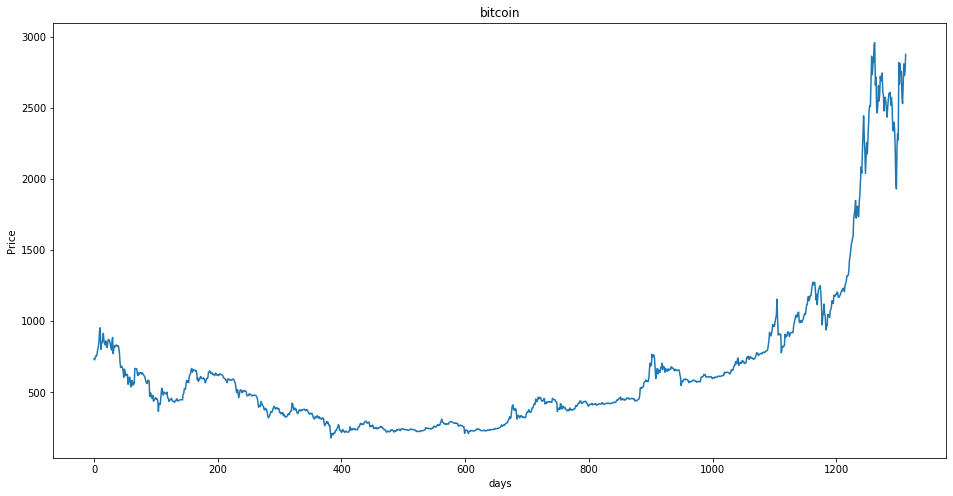

In [5]:
#visualize the close price data
plt.figure(figsize=(16,8))
plt.title("bitcoin")
plt.xlabel('days')
plt.ylabel("Price")
plt.plot(df['Close'])
plt.show()

In [6]:
#get the close prize
df=df[['Close']]
df.tail()

,Close
1308,2671.78
1309,2809.01
1310,2726.45
1311,2757.18
1312,2875.34


In [111]:
#create x days into the future
future_days=3
df['predict']=df[['Close']].shift(-future_days)

In [112]:
#ctreate the 
X=np.array(df.drop(['predict'],1))[:-future_days]
print(X)

[[ 735.07]
 [ 727.83]
 [ 745.05]
 ...
 [2529.45]
 [2671.78]
 [2809.01]]


In [113]:
#
y=np.array(df['predict'])[:-future_days]
print(y)

[ 756.13  754.01  771.4  ... 2726.45 2757.18 2875.34]


In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=2)

In [115]:
x_future=df.drop(['predict'],1)[:-future_days]
x_future= x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[2529.45],
       [2671.78],
       [2809.01]])

In [116]:
predicted_y = lnr.predict(x_future)
print(predicted_y)

[2648.54368654 2798.63406726 2943.34637631]


In [117]:
predicted_y = lnr.predict(X_test)
print("predicted y records:")

a=predicted_y
b=y_test

predicted y records:


In [118]:
#DEcision Tree
from sklearn.tree import DecisionTreeClassifier

In [119]:
tree=DecisionTreeRegressor().fit(X_train,y_train)


In [120]:
tree_predict=tree.predict(X_test)

In [121]:
#print(tree_predict)
print()
#print(y_test)

In [122]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE is:-")
print(np.sqrt(metrics.mean_squared_error(y_test, tree_predict)))



RMSE is:-
82.7267202202222


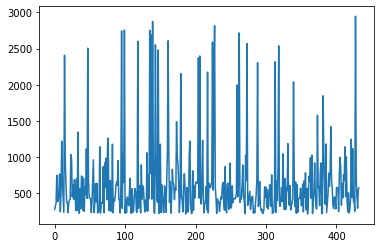

In [123]:
plt.plot(y_test)

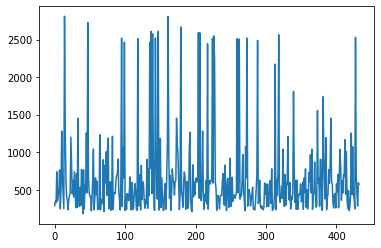

In [124]:
plt.plot(tree_predict)